**Περιγραφή**

Σ' αυτό το notebook περιγράφεται ένας τρόπος με τον οποίο μπορούμε να συγκρίνουμε κείμενα από δύο διαφορετικά sites ή από διαφορετικές κατηγορίες.

Φυσικά με τον ίδιο τρόπο μπορούμε να συγκρίνουμε και περισσότερα από 2 sites ή κατηγορίες.

### **Αυτό το notebook δεν θα τρέχει γιατί τα csvs που διαβάζει και φτιάχνει τα dataframes βρίσκονται στο δικό μου drive**

**Για να τρέξει πρέπει να βάλετε στο path των csvs το δικό σας path. Tα csvs είναι από datasets που σας έχουν δοθεί και βρίσκονται εδώ**: https://drive.google.com/drive/folders/1jcZN8He4T3TzOg1J68-aQZh2BmktOI6d

### 1. Εισαγωγή βιβλιοθηκών

Επειδή θέλουμε να χρησιμοποιήσουμε τα ελληνικά stopwords, αρχικά κατεβάζουμε το (μικρό) λεξικό της ελληνικής γλώσσας.

Όταν ολοκληρωθεί το download, μπορούμε να σβήσουμε το output και να κάνουμε την εντολή comment (βάζοντας μπροστά το `#`), ώστε να μην ξανακατέβει το λεξικό αν χρειαστεί να κάνουμε restart το runtime και να ξανατρέξουμε το notebook.

In [ ]:
#!python -m spacy download el_core_news_sm

Εισάγουμε τις βιβλιοθήκες και τα πακέτα που θα χρειαστούμε:
- τα pandas, για να φτιάχνουμε dataframes
- τη spacy, για να έχουμε nlp (θα χρειαστούμε τα stopwords)
- τον TfidfVectorizer, για να διανυσματοποιήσουμε τα κείμενα
- το cosine_similarity, για να υπολογίσουμε το βαθμό ομοιότητας των κειμένων
- τη matplotlib.pyplot και τη seaborn, για να φτιάξουμε το γράφημα της ομοιότητας (heatmap)
- από το google.colab το drive, για να διαβάζουμε τα csvs των δεδομένων μας και να αποθηκεύουμε τα γραφήματα (ή/και dataframes που φτιάχνουμε σαν csvs)

In [1]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Δημιουργούμε την nlp της ελληνικής γλώσσας για να την έχουμε έτοιμη όταν τη χρειαστούμε (στα stopwords)

In [3]:
nlp = spacy.load('el_core_news_sm')

### 2. Εισαγωγή δεδομένων (τα csvs με τα κείμενα των άρθρων)

Φτιάχνουμε ένα dataframe για το πρώτο site διαβάζοντας το csv από το path του στο drive.

- το δικό σας path και όνομα του csv θα διαφέρει από αυτό που φαίνεται εδώ
- **αν τρέξετε το παρακάτω κελί δεν θα δουλέψει γιατί το path είναι στο δικό μου gdrive**
- μπορείτε να διαβάσετε μόνο csvs που βρίσκονται στο δικό σας drive

In [4]:
ertnews_df = pd.read_csv('/content/gdrive/MyDrive/2023/teaching python/Lesson 9/datasets_MAY23_6_sites/ertnews.gr-MAY23.csv')
ertnews_df.head()

,site,url,date,section,title,author,text
0,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-01,Αμερική,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης",Συντακτική ομάδα ertnews.gr,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-t...,2023-05-01,ΔΙΕΘΝΗ,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,Συντακτική ομάδα ertnews.gr,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/rosia-...,2023-05-01,ΔΙΕΘΝΗ,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,Συντακτική Ομάδα ertnews.gr,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...
3,ertnews.gr,https://www.ertnews.gr/eidiseis/katastrafike-k...,2023-05-01,ΕΛΛΑΔΑ,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκαγιά,Συντακτική ομάδα ertnews.gr,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...
4,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/tourki...,2023-05-01,ΔΙΕΘΝΗ,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,Συντακτική Ομάδα ertnews.gr,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...


Φτιάχνουμε ένα dataframe για το δεύτερο site διαβάζοντας το csv από το path του στο drive.

In [5]:
in_df = pd.read_csv('/content/gdrive/MyDrive/2023/teaching python/Lesson 9/datasets_MAY23_6_sites/in.gr-MAY23.csv')
in_df.head()

,site,url,date,section,title,author,text
0,in.gr,https://www.in.gr/2023/05/01/world/oukrania-sy...,2023-05-01,Κόσμος,Ουκρανία: Συνάντηση με ΝΑΤΟ για τις ανάγκες τη...,Σύνταξη ΙΝ,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,in.gr,https://www.in.gr/2023/05/01/greece/kairos-vro...,2023-05-01,Ελλάδα,Καιρός: Με βροχές και καταιγίδες η επιστροφή τ...,Σύνταξη ΙΝ,Με άστατο καιρό θα πραγματοποιηθεί η επιστροφή...
2,in.gr,https://www.in.gr/2023/05/01/sports/on-field/o...,2023-05-01,On Field,Ο μύθος του Γουέμπλεϊ έγινε εκατό χρόνων,Γιώργος Νασμής,"Είναι εμβληματικό, σημείο αναφοράς, το μέρος π..."
3,in.gr,https://www.in.gr/2023/05/01/world/paragouai-n...,2023-05-01,Κόσμος,Παραγουάη: Νέος πρόεδρος εκλέγεται ο δεξιός Σα...,Σύνταξη ΙΝ,"Ο οικονομολόγος Σαντιάγο Πένια, ο υποψήφιος το..."
4,in.gr,https://www.in.gr/2023/05/01/world/tagip-ernto...,2023-05-01,Κόσμος,Ταγίπ Ερντογάν: Ο φερόμενος ως ηγέτης του Ισλα...,Σύνταξη ΙΝ,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...


### 3. Σύγκριση ομοιότητας όλων των άρθρων των δύο sites

Φυσικά μπορείτε να συγκρίνετε περισσότερα από δύο sites ακολουθώντας την ίδια διαδικασία

**Η λογική είναι η εξής**:

Η σύγκριση γίνεται μεταξύ κειμένων. Εφόσον θέλουμε να συγκρίνουμε την ομοιότητα όλης της αρθρογραφίας ενός site μέ εκείνη ενός άλλου και εφόσον στο dataframe του κάθε site έχουμε τα άρθρα ξεχωριστά, πρέπει να συνενώσουμε τα κείμενα των άρθρων κάθε site σε ένα text.

Έτσι θα έχουμε 2 texts, ένα για κάθε site και θα τα συγκρίνουμε μεταξύ τους.

In [6]:
# φτιάχνω ένα text για τo ertnews.gr με συνένωση των κειμένων ολων των άρθρων του
ertnews_text = ertnews_df['text'].str.cat(sep = ' ')
ertnews_text[:665] # με το [:665] θα δω τους 665 πρώτους χαρακτήρες του συνενωμένου κειμένου

'Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος κόμματος Colorado (δεξιά) –στην εξουσία επί σχεδόν οκτώ δεκαετίες στην Παραγουάη–, εξελέγη πρόεδρος της χώρας επικρατώντας του βασικού αντιπάλου του, του κεντροαριστερού Εφραίν Αλέγκρε, σύμφωνα με τα επίσημα αποτελέσματα. Ο κ. Πένια, οικονομολόγος 44 ετών, άλλοτε υπουργός Οικονομικών (2015-2017) της κυβέρνησης του προέδρου Οράσιο Καρτές (2013-2018), ανακηρύχθηκε νικητής από το εκλογοδικείο (την εθνική εφορευτική επιτροπή), καθώς συγκέντρωνε το 42% και πλέον των ψήφων, έναντι 27,5% του εξηντάρη κ. Αλέγκρε, με το 96% των ψηφοδελτίων να έχει καταμετρηθεί. Θα διαδεχθεί τον Αύγουστο τον Μάριο Άμπντο Μπενίτες. Η προεδ'

In [7]:
# φτιάχνω ένα text για το in.gr με συνένωση των κειμένων ολων των άρθρων του
in_text = in_df['text'].str.cat(sep = ' ')
in_text[:665]

'Εν μέσω προετοιμασιών για την πολυσυζητημένη ουκρανική αντεπίθεση προκειμένου να ανακαταληφθούν εδάφη που κατέχουν οι ρωσικές ένοπλες δυνάμεις στην ανατολική Ουκρανία, ο επικεφαλής των ουκρανικών ένοπλων δυνάμεων Βάλερι Ζαλούζνι συναντήθηκε με τον διοικητή των δυνάμεων του NATO αμερικανό στρατηγό Κρίστοφερ Καβόλι για να συζητήσουν την κατάσταση στα μέτωπα (στη φωτογραφία του Reuters/Carlos Barria, επάνω, ο μικρός Μιχαήλ σπαράζει δίπλα στα φέρετρα της αδερφής του Σοφίας και του αδερφού του Κίρυλου, που σκοτώθηκαν κατά τη ρωσική πυραυλική επίθεση στην πόλη Ουμάν). «Ν’ αντιμετωπιστούν οι προκλήσεις»«Περιέγραψα τα πιθανά σενάρια, τις απειλές και τις προϋποθέσει'

Φτιάχνω ένα df με τα 2 texts

In [8]:
two_sites_list = [] # φτιάχνω μια λίστα για να βάλω μέσα τα dictionaries που φτιάχνω παρακάτω
ertnewsD = {'site' : 'ertnews.gr', 'text' : ertnews_text} # φτιάχνω dictionary για τo ertnews.gr
two_sites_list.append(ertnewsD) # βάζω το dictionary στη λίστα
inD = {'site' : 'in.gr', 'text' : in_text} # φτιάχνω dictionary για το in.gr
two_sites_list.append(inD) # βάζω το dictionary στη λίστα
two_sites_df = pd.DataFrame(two_sites_list) # φτιάχνω dataframe από τη λίστα με τα δύο dictionaries
two_sites_df

,site,text
0,ertnews.gr,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,in.gr,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...


Mε τον tfidf_vectorizer, φτιάχνω τα vectors των texts που είναι στη στήλη `text` του `two_sites_df`. Με το `max_features=500` ζητάω τα vectors να περιλαμβάνουν μόνο τις 500 συχνότερες λέξεις.

In [9]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])

Φτιάχνω το array της ομοιότητας με το cosine_similarity

In [10]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
print("cosine scores ==> ", arr)

cosine scores ==>  [[1.         0.77569182]
 [0.77569182 1.        ]]


Φτιάχνω το heatmap

**Note**: η τελευταία εντολή στο παρακάτω cell σώζει την εικόνα του γραφήματος - θα πρέπει να βάλετε το path για το δικό σας drive

([<matplotlib.axis.YTick at 0x7f825af66950>,
 [Text(0, 0, 'ertnews.gr'), Text(0, 1, 'in.gr')])

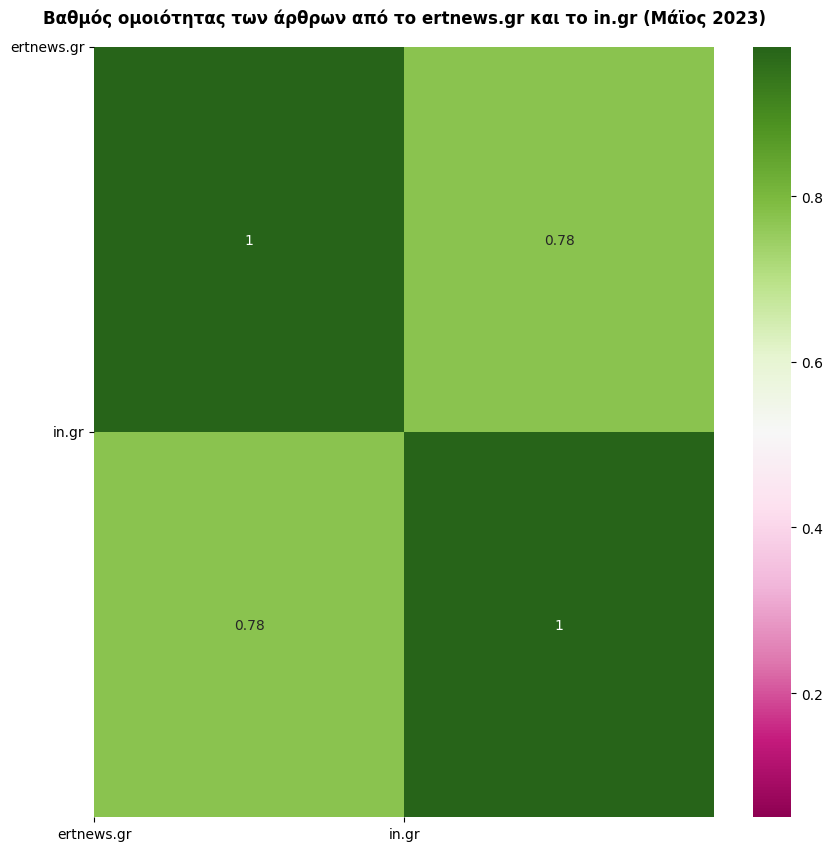

In [11]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των άρθρων από το ertnews.gr και το in.gr (Μάϊος 2023)', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG") # το vmin και το vmax ορίζουν πάνω και κάτω από ποιο αριθμό ομοιότητας θα εμφανίζεται το ντεγκραντέ των δύο ακραίων χρωμάτων
plt.xticks([0, 1], ['ertnews.gr', 'in.gr']) # ορίζω να εμφανίζονται τα ονόματα των sites αντί για το 0 και 1 του index, στον άξονα x
plt.yticks([0, 1], ['ertnews.gr', 'in.gr'], rotation=0) # ορίζω να εμφανίζονται τα ονόματα των sites αντί για το 0 και 1 του index, στον άξονα y - με το rotation=0 κάνω τα ονόματα των sites στον άξονα y να εμφανίζονται οριζόντια
#plt.savefig('/content/gdrive/MyDrive/2023/teaching python/Lesson 9/datasets_MAY23_6_sites/ertnews_in_heatmap.png') # αποθηκεύω την εικόνα του γραφήματος στο drive
